In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import folium

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot



In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df= pd.read_csv("Latest Covid-19 India Status.csv")

In [4]:
df

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6214190,106809,5980350,127031,1.72,96.24,2.04
1,Kerala,3160937,125535,3020052,15350,3.97,95.54,0.49
2,Karnataka,2883947,29314,2818476,36157,1.02,97.73,1.25
3,Tamil Nadu,2535402,27897,2473781,33724,1.10,97.57,1.33
4,Andhra Pradesh,1940096,24708,1902256,13132,1.27,98.05,0.68
5,Uttar Pradesh,1707847,1262,1683866,22719,0.07,98.60,1.33
6,West Bengal,1518181,13111,1487071,17999,0.86,97.95,1.19
7,Delhi,1435529,592,1409910,25027,0.04,98.22,1.74
8,Chhattisgarh,999853,3719,982638,13496,0.37,98.28,1.35
9,Odisha,954326,18850,930418,5058,1.98,97.49,0.53


In [5]:
total_cases_overall=df['Total Cases'].sum()
print('The total number of cases till now in India is ',int(total_cases_overall/100000),'M')

The total number of cases till now in India is  311 M


In [6]:
df.style.background_gradient(cmap='Reds')

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6214190,106809,5980350,127031,1.72,96.24,2.04
1,Kerala,3160937,125535,3020052,15350,3.97,95.54,0.49
2,Karnataka,2883947,29314,2818476,36157,1.02,97.73,1.25
3,Tamil Nadu,2535402,27897,2473781,33724,1.1,97.57,1.33
4,Andhra Pradesh,1940096,24708,1902256,13132,1.27,98.05,0.68
5,Uttar Pradesh,1707847,1262,1683866,22719,0.07,98.6,1.33
6,West Bengal,1518181,13111,1487071,17999,0.86,97.95,1.19
7,Delhi,1435529,592,1409910,25027,0.04,98.22,1.74
8,Chhattisgarh,999853,3719,982638,13496,0.37,98.28,1.35
9,Odisha,954326,18850,930418,5058,1.98,97.49,0.53


In [7]:
Total_Active_Cases=df.groupby('State/UTs')['Total Cases'].sum().sort_values(ascending=False).to_frame()

In [8]:
Total_Active_Cases

,Total Cases
State/UTs,
Maharashtra,6214190
Kerala,3160937
Karnataka,2883947
Tamil Nadu,2535402
Andhra Pradesh,1940096
Uttar Pradesh,1707847
West Bengal,1518181
Delhi,1435529
Chhattisgarh,999853


In [12]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Total Cases
State/UTs,
Maharashtra,6214190
Kerala,3160937
Karnataka,2883947
Tamil Nadu,2535402
Andhra Pradesh,1940096
Uttar Pradesh,1707847
West Bengal,1518181
Delhi,1435529
Chhattisgarh,999853


# Graphical visuals

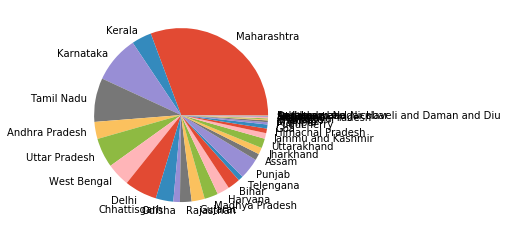

In [33]:
plt.pie(df['Deaths'],labels=df['State/UTs'])
plt.show()

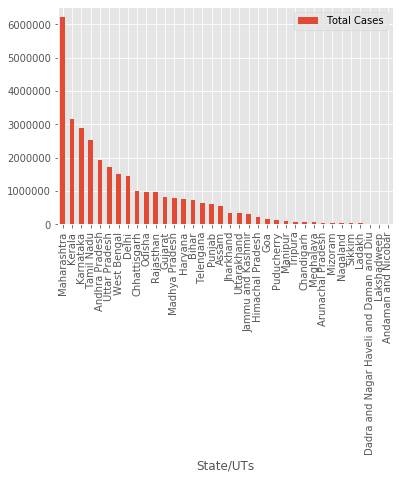

In [34]:
df.plot(kind='bar',x='State/UTs',y='Total Cases')
plt.show()
#interactive
df.iplot(kind='bar',x='State/UTs',y='Total Cases')

In [20]:
px.bar(df,x='State/UTs',y='Deaths')

In [19]:
df.iplot(kind='scatter',x='State/UTs',y='Total Cases',mode='markers+lines',title='corona',xTitle='State/UTs',yTitle='Total Cases',colors='red',size=10)
px.scatter(df,x='State/UTs',y='Total Cases')

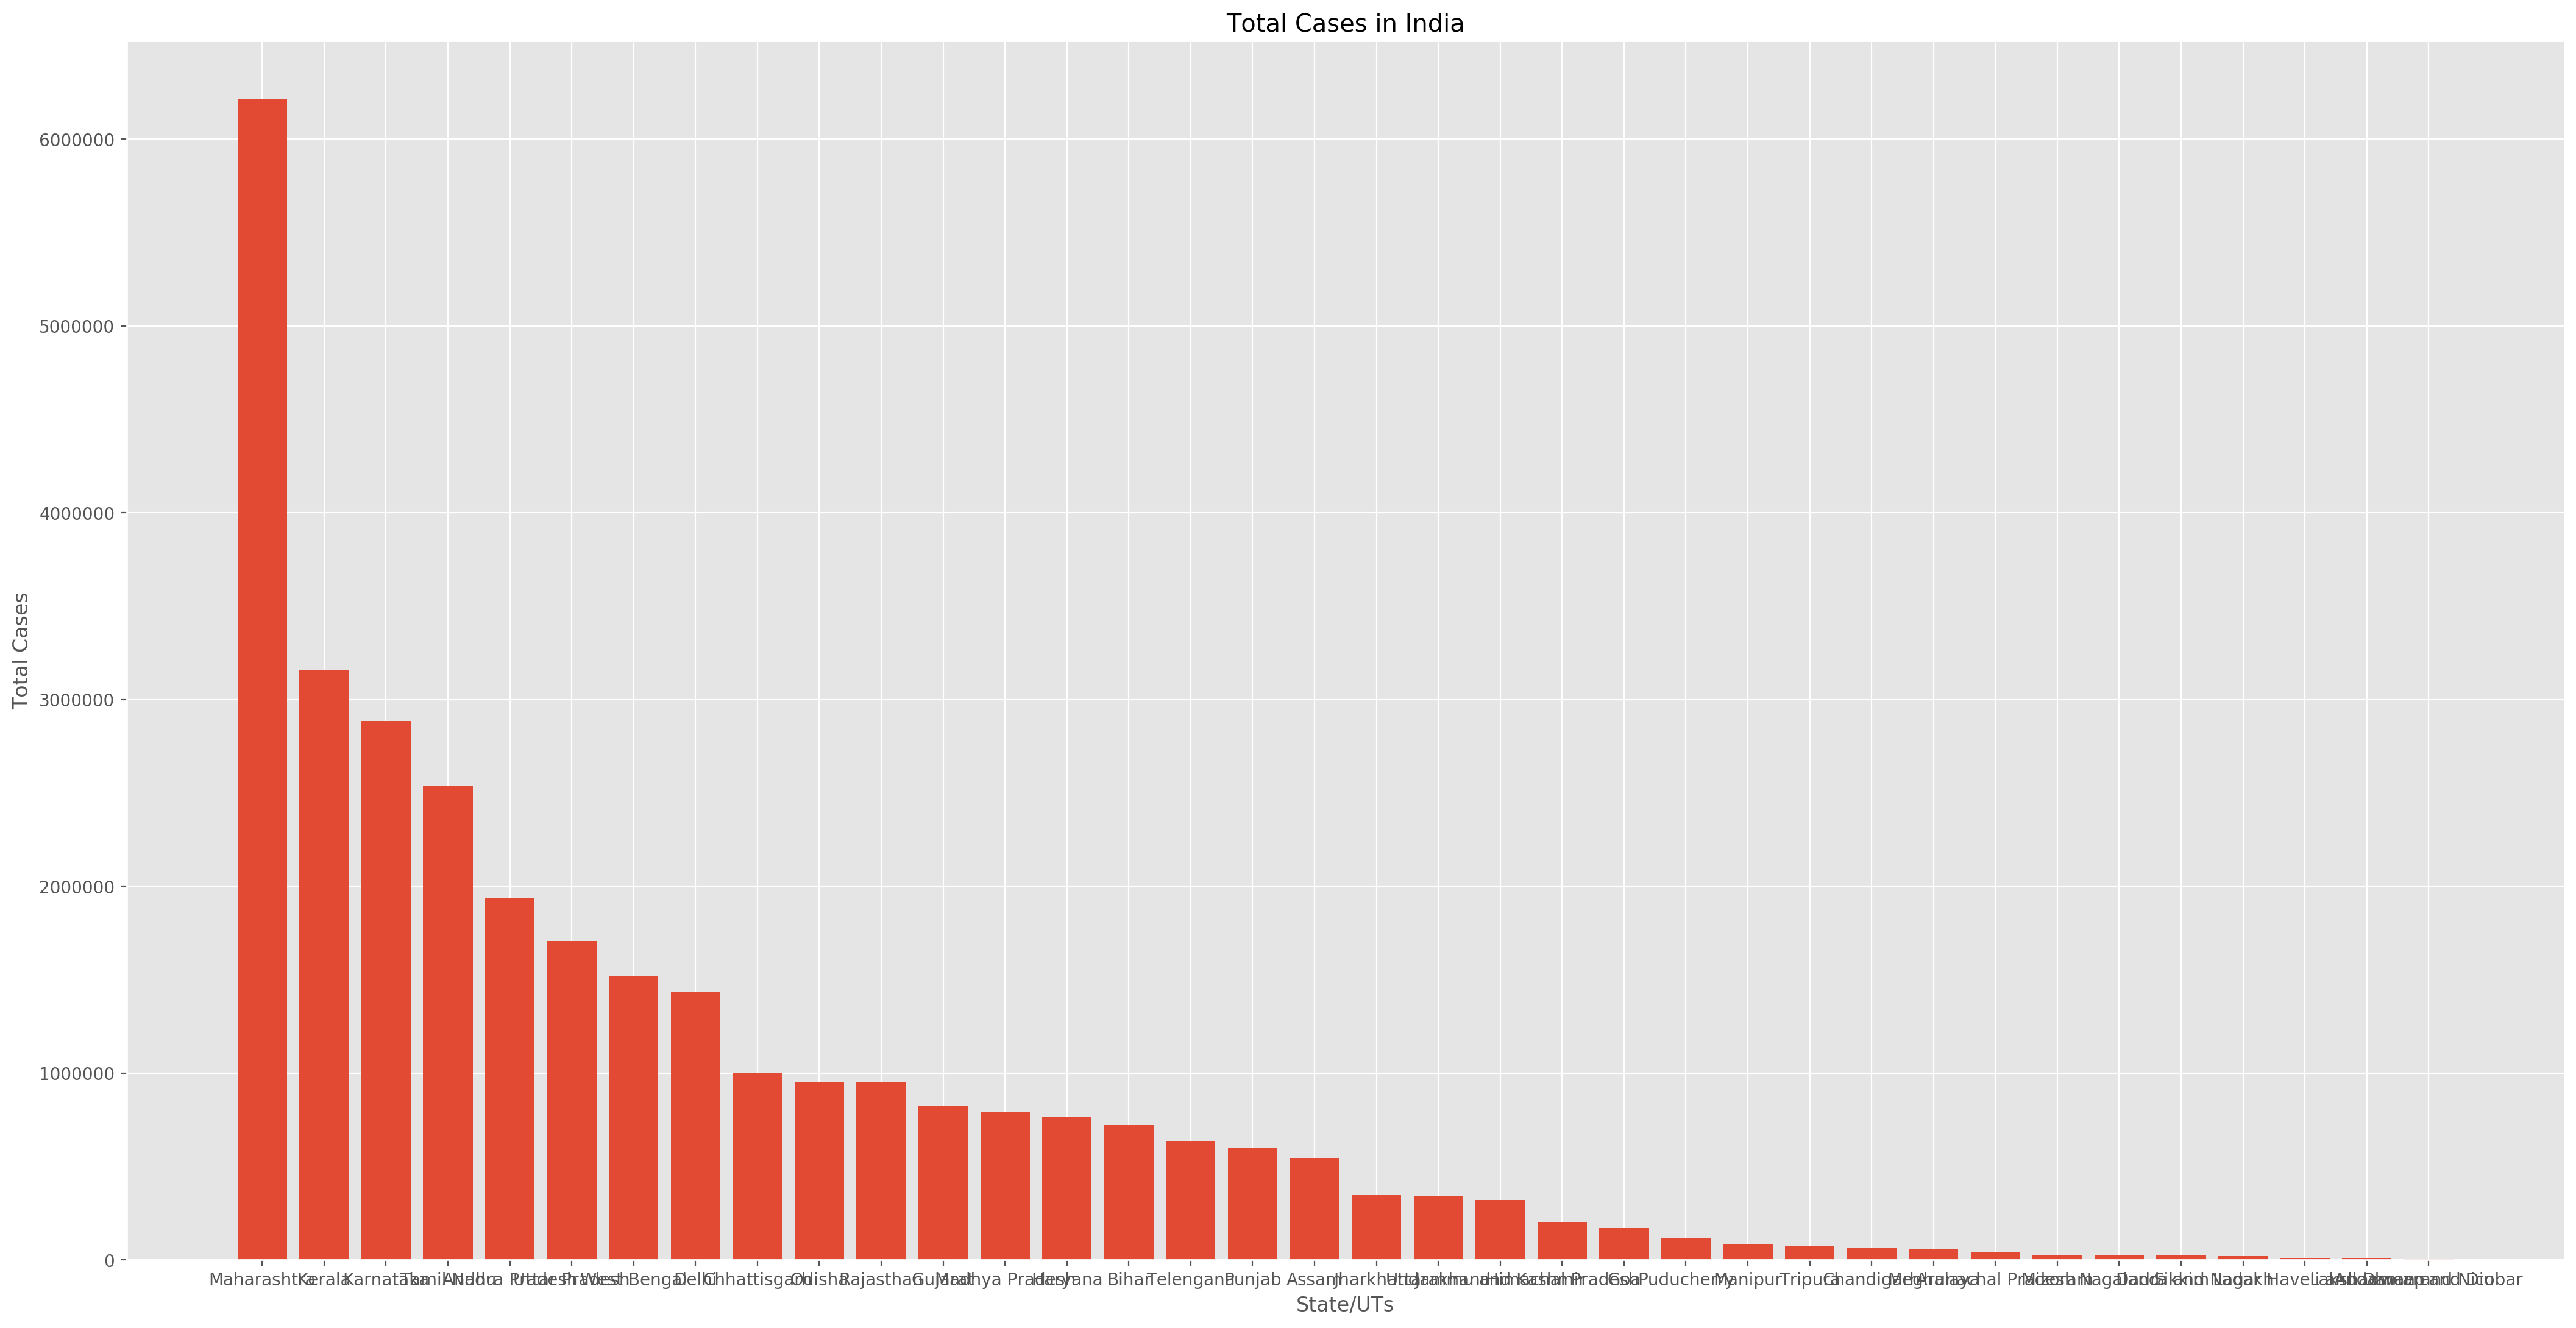

In [36]:
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['State/UTs'],df['Total Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("State/UTs")
axes.set_ylabel("Total Cases")
plt.show()

#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['State/UTs'],y=df['Total Cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='State/UTs'),yaxis=dict(title='Total Cases'))